<h2>Coding A Neural Network: Image Classification</h2>

<h3>Step 1: Load the Libraries</h3>

In [0]:
import keras                               # deep learning package
from keras.datasets import mnist           # dataset we will use to train our model
from keras.layers import Dense             # Dense describes how the layers are connected
from keras.models import Sequential        # Sequential means we are creating a sequence of connectec layers
from keras.optimizers import SGD           # Sochastic gradient descent is the method used to find local minimum
import matplotlib.pyplot as plt            # visualize images
from keras.preprocessing import image      # preprocess images
#import tensorflowjs as tfjs

Using TensorFlow backend.


<h3>Step 2: Obtain Data</h3>

In [0]:
(train_x,train_y),(test_x,test_y) = mnist.load_data()
(train_x,train_y),(test_x,test_y) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


<h3>Step 3: Reshape Data</h3>

In [0]:
#print(train_x.shape)
#print(test_x.shape)


train_x= train_x.reshape(60000,784)
test_x= test_x.reshape(10000,784)

train_y = keras.utils.to_categorical(train_y,10)
test_y = keras.utils.to_categorical(test_y,10)

print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)

(60000, 784)
(10000, 784)
(60000, 10)
(10000, 10)


<h3>Step 4: Define Your Model</h3>

In [0]:
model = Sequential()
model.add(Dense(units=128,activation='relu',input_shape=(784,)))
model.add(Dense(units=128,activation='relu'))
model.add(Dense(units=128,activation='relu'))
model.add(Dense(units=10,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 134,794
Trainable params: 134,794
Non-trainable params: 0
_________________________________________________________________


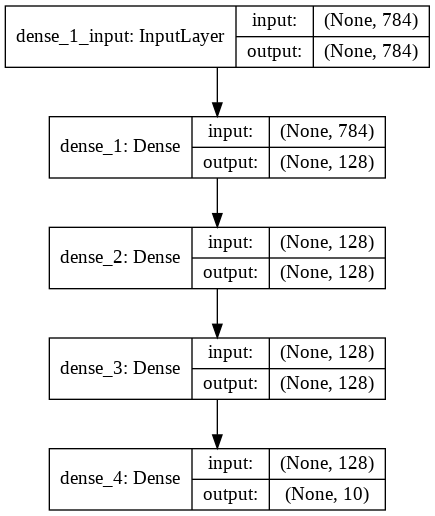

In [0]:
#another way to visualize the network
keras.utils.plot_model(
    model,
    show_shapes=True,
    show_layer_names=True,
)

<h3>Step 5: Compile Your Model</h3>

In [0]:
model.compile(optimizer=SGD(0.001),loss='categorical_crossentropy',metrics=['accuracy'])


<h3>Step 6: Fit Your Model</h3>

In [0]:
history=model.fit(train_x,train_y,batch_size=32,epochs=50,verbose=1)

Epoch 1/50
60000/60000 [==============================] - 4s 73us/step - loss: 1.0273 - accuracy: 0.8518
Epoch 2/50
60000/60000 [==============================] - 4s 68us/step - loss: 0.2777 - accuracy: 0.9245
Epoch 3/50
60000/60000 [==============================] - 4s 69us/step - loss: 0.1996 - accuracy: 0.9430
Epoch 4/50
60000/60000 [==============================] - 4s 69us/step - loss: 0.1579 - accuracy: 0.9532
Epoch 5/50
60000/60000 [==============================] - 4s 67us/step - loss: 0.1314 - accuracy: 0.9608
Epoch 6/50
60000/60000 [==============================] - 4s 69us/step - loss: 0.1122 - accuracy: 0.9660
Epoch 7/50
60000/60000 [==============================] - 4s 68us/step - loss: 0.0968 - accuracy: 0.9708
Epoch 8/50
60000/60000 [==============================] - 4s 68us/step - loss: 0.0854 - accuracy: 0.9743
Epoch 9/50
60000/60000 [==============================] - 4s 68us/step - loss: 0.0758 - accuracy: 0.9767
Epoch 10/50
60000/60000 [==============================

<h3>Step 7: Save Your Model</h3>

In [0]:
model.save("mnistmodel.h5")                   #save the whole model into a file to be used later

<h3>Step 8: Assess Model Performance</h3>

In [0]:
accuracy = model.evaluate(x=test_x,y=test_y,batch_size=32)       #assess the model performance: accuracy
print("Accuracy: ",accuracy[1])                                  #print the accuracy

10000/10000 [==============================] - 0s 28us/step
Accuracy:  0.9591000080108643


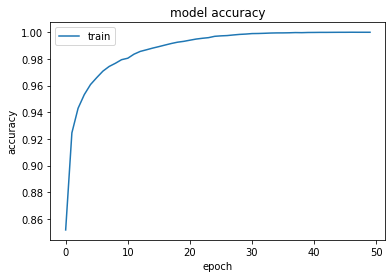

In [0]:
# summarize history for accuracy
#print(history.history.keys())
plt.plot(history.history['accuracy'])           #plot accuracy
plt.title('model accuracy')                #add a title for the plot
plt.ylabel('accuracy')                     #add a y axis label
plt.xlabel('epoch')                        #add x axis label
plt.legend(['train'], loc='upper left')    #add a legend and specify the position
plt.show()

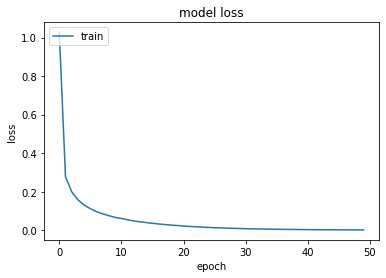

In [0]:
#lets plot loss now
plt.plot(history.history['loss'])          #plot loss
plt.title('model loss')                    #add a title for the plot
plt.ylabel('loss')                         #add a y axis label
plt.xlabel('epoch')                        #add x axis label
plt.legend(['train'], loc='upper left')    #add a legend and specify the position
plt.show()    

<h3>Step 9: Test a Case</h3>

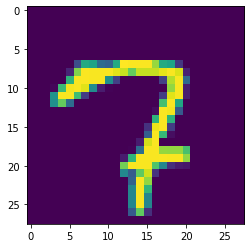

In [0]:
sample=test_x[36]
sample=sample.reshape((28,28))
plt.imshow(sample)

In [0]:
sample=sample.reshape((1,784))
prediction=model.predict_classes(sample)

In [0]:
prediction

array([7])

In [0]:
model.predict(sample)

array([[7.3485369e-18, 1.4551365e-21, 3.5935082e-07, 2.4023868e-11,
        3.0107959e-20, 5.5548918e-16, 9.0739052e-29, 9.9999964e-01,
        1.1354879e-17, 9.8294951e-17]], dtype=float32)